In [198]:
import pandas as pd

In [430]:
import numpy as np

In [431]:
import openpyxl

In [199]:
df = pd.read_csv("C:/Users/acer/Documents/Data Analyst - Field Training Program/Portfolio/3. E-commerce/Dataset/data.csv", encoding="latin1")

## Key Points

- Customers are mostly wholesalers
- Dataset b/w 01/12/2010-09/12/2011
- The company mainly sells unique all-occasion gifts



### Problem statement & Questions

" How can the company optimize revenue, customer retention, and inventory efficiency by better understanding customer purchasing behavior, product performance, and sales patterns across markets? "


- Which customers generate the most revenue, and how can we increase their loyalty?
- What products are underperforming, and should we discontinue or promote them more heavily?
- How do sales trends vary by country, and what can we do to optimize performance in underperforming regions?
- What is the return rate by product, and how can we reduce returns to improve profitability?
- What are the seasonal buying patterns, and how can we optimize inventory and promotions around these periods?




### Final Outputs Metrics

1. Revenue by Customer & Product
    - Top 10 Customers by Revenue
    - Top 10 Products by Revenue
    - Revenue per Product Category
2. Customer Segmentation & Buying Patterns
    - Customer Lifetime Value (CLV) – Estimated future revenue from each customer.
    - Frequency of Purchase – Average number of purchases per customer within a time period.
    - Average Order Value (AOV) – The average amount spent per order for each customer group.
3. Sales Trends & Seasonality
    - Monthly/Quarterly Sales Trend
    - Seasonal Demand Patterns
4. Product Performance & Inventory Optimization
    - Slow-Moving Products – Products with low sales or excess inventory.
    - Stockouts & Overstock Analysis – Frequency of stockouts for popular products or overstocked items.
5. Sales by Country/Region
    - Total Sales by Country
    - Country Growth Rate – Growth in revenue per country over time, identifying high-potential markets.
    - Regional Market Share – Comparing the company’s sales to overall market potential in different countries.
6. Customer Acquisition and Retention Rates
    - Customer Churn Rate – Percentage of customers who stopped buying after a certain period.
    - New vs. Returning Customer Sales – Revenue split between new customers and repeat buyers.
    - Customer Retention Rate – Percentage of customers who make repeat purchases.   

#### The final outputs could include:

- A Customer Insights Dashboard that shows customer segmentation, purchasing patterns, and lifetime value.
- A Product Performance Report to help identify which products to focus on, promote, or discontinue.
- A Geographic Sales Report highlighting performance across different countries/regions.
- A Revenue Forecasting Model based on sales trends, seasonality, and customer purchasing behavior.
- A Return & Satisfaction Analysis to reduce returns and improve product offerings.




In [200]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning Plan

This dataset contains transactional sales data with missing values, inconsistent formats, and potential anomalies that must be addressed before analysis. The following steps outline the data cleaning and preprocessing strategy.

---

### 1. Data Type Standardization
- Convert **InvoiceDate** from object to `datetime` format.
- Ensure **CustomerID** is stored as an integer (or nullable integer) instead of float.
- Confirm **Quantity** is an integer and **UnitPrice** is a float.

---

### 2. Handling Missing Values
- **CustomerID**:
  - Remove records with missing CustomerID for customer-level analysis (CLV, retention, segmentation).
  - Retain these records for overall sales and product-level analysis if needed.
- **Description**:
  - Fill missing product descriptions using StockCode where possible.
  - Drop rows with missing descriptions if they cannot be reliably inferred.
  - Checking for rows "POST" or "BANK" and excluding them for product related analysis   

---

### 3. Removing Invalid & Anomalous Records
- Remove transactions with:
  - **Quantity ≤ 0** (indicates returns or data errors).
  - **UnitPrice ≤ 0** (invalid pricing).
- Identify and flag return transactions (negative quantities or invoice numbers starting with “C”) for return rate analysis.

---

### 4. Duplicate Handling
- Identify duplicate rows based on:
  - InvoiceNo
  - StockCode
  - Quantity
  - InvoiceDate
- Remove exact duplicates to avoid revenue inflation.

---

### 5. Outlier Detection & Treatment
- Detect extreme outliers in:
  - Quantity
  - UnitPrice
  - Revenue (Quantity × UnitPrice)
- Cap or remove outliers using statistical methods (IQR or Z-score) depending on business relevance.

---

### 6. Feature Engineering
- Create derived features:
  - **Revenue** = Quantity × UnitPrice
  - **Invoice Month / Quarter / Year** from InvoiceDate
  - **Customer Type** (New vs Returning)
  - **Order Value** per invoice
- Aggregate data at:
  - Customer level (CLV, frequency, AOV)
  - Product level (sales volume, revenue)
  - Country level (regional performance)

---

### 7. Country & Text Standardization
- Standardize **Country** names (case formatting, spelling).
- Clean **Description** text:
  - Remove extra whitespace
  - Convert to uppercase or lowercase consistently

---

### 8. Time-Based Validation
- Confirm all transactions fall within the expected date range:
  - **01/12/2010 – 09/12/2011**
- Remove or flag any records outside this period.

---

### 9. Data Integrity Checks
- Validate:
  - Revenue totals after cleaning
  - Consistency between Quantity, UnitPrice, and Revenue
- Re-run summary statistics after each major cleaning step.

---

### 10. Final Clean Dataset Outputs
- **Clean Transactions Dataset** – Ready for exploratory analysis
- **Customer-Level Dataset** – For segmentation, CLV, retention analysis
- **Product-Level Dataset** – For inventory and performance optimization
- **Country-Level Dataset** – For geographic and market analysis




## Cleaning 1: Data Type Standardization

#### Cleaning 1.1: Convert **InvoiceDate** from object to `datetime` format.

In [202]:
# Cleaning 1.1

df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])



In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Cleaning 1.2: Ensure **CustomerID** is stored as an integer (or nullable integer) instead of float. 

In [204]:
# Cleaning 1.2

df['CustomerID'] = df['CustomerID'].astype("Int64")



In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.6+ MB


In [206]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Cleaning 2: Handling Missing Values

#### Cleaning 2.1: Retaining records with CustomerID for customer-level analysis (CLV, retention, segmentation).

In [207]:
# Cleaning 2.1

df_cus = df.dropna(subset=["CustomerID"])


In [208]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      406829 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.3+ MB


#### Cleaning 2.2: Fill missing product descriptions using StockCode where possible.

In [209]:
# Cleaning 2.2

desc_check = (
    df.dropna(subset=["Description"])
      .groupby("StockCode")["Description"]
      .nunique()
      .sort_values(ascending=False)
)

desc_check.head(10)




StockCode
20713     8
23084     7
21830     6
85175     6
21181     5
23131     5
23343     5
72807A    5
85172     5
21621     4
Name: Description, dtype: int64

In [210]:
stock_desc_map = (
    df.dropna(subset=["Description"])
      .groupby("StockCode")["Description"]
      .agg(lambda x: x.mode().iloc[0])
)

In [211]:
stock_desc_map.head()

StockCode
10002     INFLATABLE POLITICAL GLOBE 
10080        GROOVY CACTUS INFLATABLE
10120                    DOGGY RUBBER
10123C          HEARTS WRAPPING TAPE 
10124A    SPOTS ON RED BOOKCOVER TAPE
Name: Description, dtype: object

In [212]:
# Flaggin filled description
df["DescriptionFilled"] = df["Description"].isna()



In [213]:
df["Description"] = df["Description"].fillna(
    df["StockCode"].map(stock_desc_map)
)


In [214]:
df["Description"].isna().sum()


np.int64(112)

Dropping rows with na description

In [215]:
df = df.dropna(subset=['Description'])
df["Description"].isna().sum()


np.int64(0)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          541797 non-null  object        
 1   StockCode          541797 non-null  object        
 2   Description        541797 non-null  object        
 3   Quantity           541797 non-null  int64         
 4   InvoiceDate        541797 non-null  datetime64[ns]
 5   UnitPrice          541797 non-null  float64       
 6   CustomerID         406829 non-null  Int64         
 7   Country            541797 non-null  object        
 8   DescriptionFilled  541797 non-null  bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 38.2+ MB


Filter out these rows for product-based analysis

In [217]:
df_prod_only = df[~df["StockCode"].str.contains('POST|BANK|SHIPPING|DISCOUNT|LOYALTY', case=False, na=False)]
df_prod_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540504 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          540504 non-null  object        
 1   StockCode          540504 non-null  object        
 2   Description        540504 non-null  object        
 3   Quantity           540504 non-null  int64         
 4   InvoiceDate        540504 non-null  datetime64[ns]
 5   UnitPrice          540504 non-null  float64       
 6   CustomerID         405621 non-null  Int64         
 7   Country            540504 non-null  object        
 8   DescriptionFilled  540504 non-null  bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 38.1+ MB


## 3. Removing Invalid & Anomalous Records

#### 3.1 Identify and flag return transactions

In [218]:
df["IsReturn"] = (
    (
        (df["Quantity"] < 0) |
        (df["InvoiceNo"].str.startswith("C"))
    ) &
    (df["UnitPrice"] > 0)
)

In [219]:
returns_df = df[df['IsReturn']]

In [220]:
returns_df.shape

(9288, 10)

#### 3.2 Separating promotional/gift records 

In [221]:
promo_df = df[(df["UnitPrice"] <= 0) & (~df["CustomerID"].isna())]
promo_df.shape

(40, 10)

In [222]:
df = df[~((df["UnitPrice"] <= 0) & (~df["CustomerID"].isna()))]

#### 3.3 Dropping records where UnitPrice < 0 or "Adjust bad Debt" 

In [223]:
df_prod_only[
    df_prod_only['UnitPrice'] < 0
    ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,False


In [224]:
df[
    (df['UnitPrice'] < 0 ) 
]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,False,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,False,False


In [225]:
df = df[df['UnitPrice'] >= 0]


#### 3.4 Separating "inventory adjustment" records

In [226]:
inventory_adjustments = df[
    (df['UnitPrice'] == 0) & 
    (df['Quantity'] < 0 )
]


In [227]:
inventory_adjustments.shape

(1239, 10)

In [228]:
inventory_adjustments.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,<NA>,United Kingdom,False,False
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,<NA>,United Kingdom,False,False
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,<NA>,United Kingdom,False,False
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,<NA>,United Kingdom,False,False
538919,581422,23169,smashed,-235,2011-12-08 15:24:00,0.0,<NA>,United Kingdom,False,False


In [229]:
df = df[
    ~((df['UnitPrice'] == 0) & 
    (df['Quantity'] < 0 ))
]

#### 3.5 Dropping records where UnitPrice == 0, no revenue

In [230]:
df[
    df['UnitPrice'] == 0
].shape

(1124, 10)

In [231]:
df = df[
    ~(df['UnitPrice'] == 0)
]

In [232]:
df.shape

(539392, 10)

#### 3.6 Recomputing sales dataset

Sales dataset must fulfil the following conditions

| Condition                          | Why                   |
| ---------------------------------- | --------------------- |
| `IsReturn == False`                | Exclude cancellations |
| `Quantity > 0`                     | Items sold            |
| `UnitPrice > 0`                    | Revenue-generating    |




In [233]:
sales_df = df[
    (~df['IsReturn'])
]

In [234]:
sales_df.shape

(530104, 10)

In [235]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          530104 non-null  object        
 1   StockCode          530104 non-null  object        
 2   Description        530104 non-null  object        
 3   Quantity           530104 non-null  int64         
 4   InvoiceDate        530104 non-null  datetime64[ns]
 5   UnitPrice          530104 non-null  float64       
 6   CustomerID         397884 non-null  Int64         
 7   Country            530104 non-null  object        
 8   DescriptionFilled  530104 non-null  bool          
 9   IsReturn           530104 non-null  bool          
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 37.9+ MB


## 4: Check for Duplication

In [236]:
duplicates = df[df.duplicated(subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate'], keep='first')]
duplicates.shape[0]



5419

In [237]:
df.shape

(539392, 10)

In [240]:
df.drop_duplicates(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice'],
    keep='first',
    inplace=True
)

In [241]:
df.shape

(534127, 10)

## Cleaning 5: Outliers Detection

Check for outliers and make sure if a return is avaible so the net rev would be 0, thereby, not requiring to remove the outlier. Or we would remove both of the records (orignal & return)

In [258]:
# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [269]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534127 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          534127 non-null  object        
 1   StockCode          534127 non-null  object        
 2   Description        534127 non-null  object        
 3   Quantity           534127 non-null  int64         
 4   InvoiceDate        534127 non-null  datetime64[ns]
 5   UnitPrice          534127 non-null  float64       
 6   CustomerID         401562 non-null  Int64         
 7   Country            534127 non-null  object        
 8   DescriptionFilled  534127 non-null  bool          
 9   IsReturn           534127 non-null  bool          
 10  Revenue            534127 non-null  float64       
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 42.3+ MB


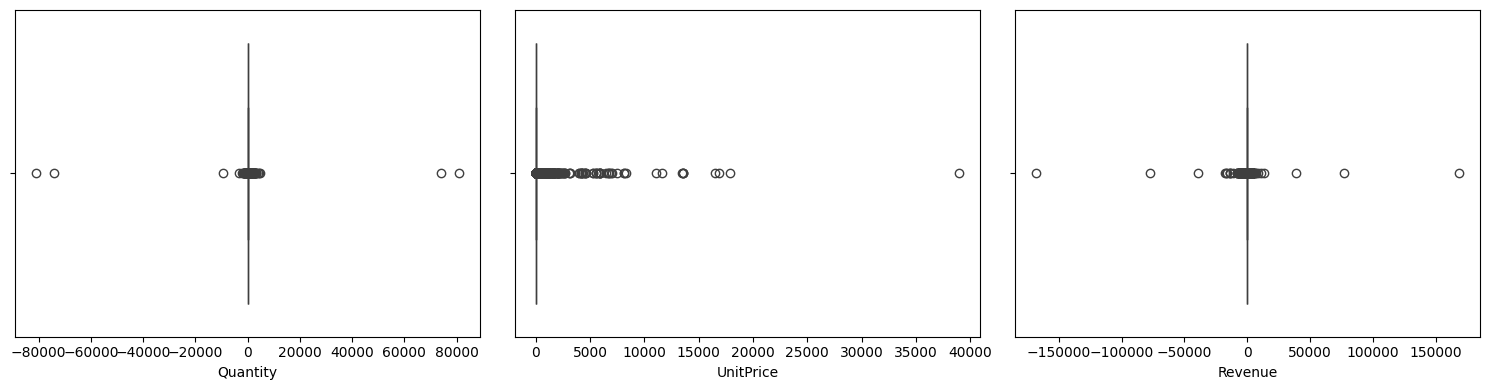

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x=df["Quantity"], ax=axes[0])
sns.boxplot(x=df["UnitPrice"], ax=axes[1])
sns.boxplot(x=df["Revenue"], ax=axes[2])

plt.tight_layout()
plt.show()


In [273]:
df[df['Quantity'] > 10000 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False,False,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False,False,168469.6


In [277]:
df[df['CustomerID'] == 12346 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False,False,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,False,True,-77183.6


In [278]:
net_df = (
    df.groupby(["CustomerID", "StockCode", "UnitPrice"], as_index=False)
      .agg({
          "Quantity": "sum",
          "Revenue": "sum"
      })
)


In [279]:
net_df

,CustomerID,StockCode,UnitPrice,Quantity,Revenue
0,12346,23166,1.04,0,0.00
1,12347,16008,0.25,24,6.00
2,12347,17021,0.30,36,10.80
3,12347,20665,2.95,6,17.70
4,12347,20719,0.85,40,34.00
...,...,...,...,...,...
275939,18287,85039A,1.45,96,139.20
275940,18287,85039B,1.45,108,156.60
275941,18287,85039B,1.65,12,19.80
275942,18287,85040A,1.65,48,79.20


In [284]:
net_df = (net_df[(net_df["Quantity"] != 0) & (net_df["Revenue"] != 0)]).copy()

In [281]:
net_df

,CustomerID,StockCode,UnitPrice,Quantity,Revenue
1,12347,16008,0.25,24,6.00
2,12347,17021,0.30,36,10.80
3,12347,20665,2.95,6,17.70
4,12347,20719,0.85,40,34.00
5,12347,20780,4.65,12,55.80
...,...,...,...,...,...
275939,18287,85039A,1.45,96,139.20
275940,18287,85039B,1.45,108,156.60
275941,18287,85039B,1.65,12,19.80
275942,18287,85040A,1.65,48,79.20


In [282]:
def cap_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)


In [285]:
net_df["Quantity_capped"] = cap_iqr(net_df["Quantity"])
net_df["UnitPrice_capped"] = cap_iqr(net_df["UnitPrice"])
net_df["Revenue_capped"] = cap_iqr(net_df["Revenue"])


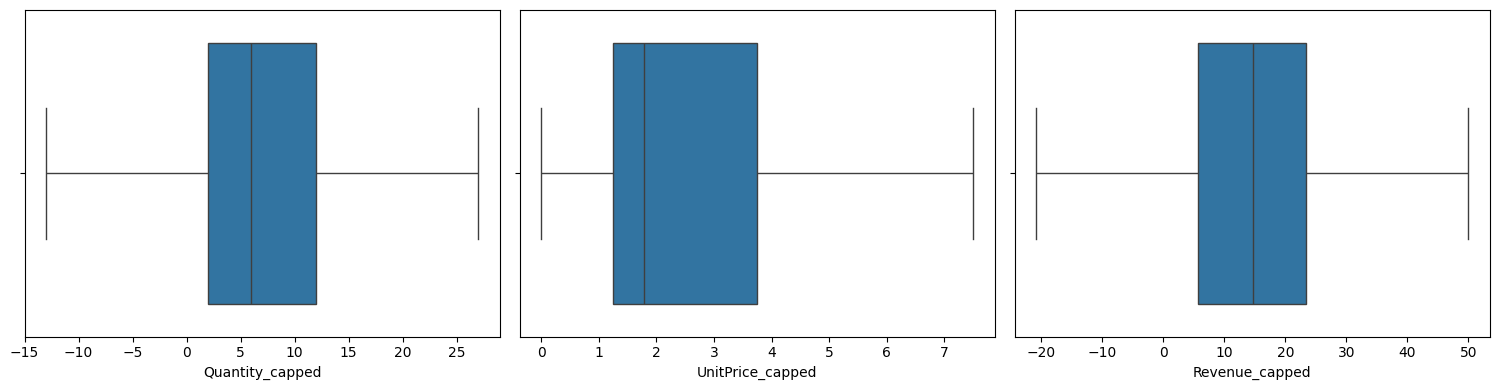

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x=net_df["Quantity_capped"], ax=axes[0])
sns.boxplot(x=net_df["UnitPrice_capped"], ax=axes[1])
sns.boxplot(x=net_df["Revenue_capped"], ax=axes[2])

plt.tight_layout()
plt.show()


In [289]:
final_df = net_df[[
    "CustomerID",
    "StockCode",
    "Quantity_capped",
    "UnitPrice_capped",
    "Revenue_capped"
]]

In [290]:
final_df

,CustomerID,StockCode,Quantity_capped,UnitPrice_capped,Revenue_capped
1,12347,16008,24,0.25,6.00
2,12347,17021,27,0.30,10.80
3,12347,20665,6,2.95,17.70
4,12347,20719,27,0.85,34.00
5,12347,20780,12,4.65,49.95
...,...,...,...,...,...
275939,18287,85039A,27,1.45,49.95
275940,18287,85039B,27,1.45,49.95
275941,18287,85039B,12,1.65,19.80
275942,18287,85040A,27,1.65,49.95


## 6. Feature Engineering

In [291]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34


#### 6.1: Invoice time features

In [292]:
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceQuarter"] = df["InvoiceDate"].dt.to_period("Q")


In [295]:
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceWeekday"] = df["InvoiceDate"].dt.weekday


In [296]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue,InvoiceYear,InvoiceMonth,InvoiceQuarter,InvoiceDay,InvoiceWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30,2010,12,2010Q4,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00,2010,12,2010Q4,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2


#### 6.2 Customer Type (New vs Returning)

In [332]:
bulk_threshold = 10000  # or domain-specific

Invalid_bulk = df[df["Quantity"].abs() > bulk_threshold]


In [333]:
df = df[~(df["Quantity"].abs() > bulk_threshold)]

In [311]:
first_purchase = (
    df.loc[df["IsReturn"] == False]
      .groupby("CustomerID")["InvoiceDate"]
      .min()
      .reset_index()
      .rename(columns={"InvoiceDate": "FirstPurchaseDate"})
)


In [312]:
first_purchase

,CustomerID,FirstPurchaseDate
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4333,18280,2011-03-07 09:52:00
4334,18281,2011-06-12 10:53:00
4335,18282,2011-08-05 13:35:00
4336,18283,2011-01-06 14:14:00


In [316]:
df = df.merge(first_purchase, on="CustomerID", how="left")


In [317]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue,InvoiceYear,InvoiceMonth,InvoiceQuarter,InvoiceDay,InvoiceWeekday,FirstPurchaseDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30,2010,12,2010Q4,1,2,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00,2010,12,2010Q4,1,2,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00


In [318]:
df["CustomerType"] = np.where(
    df["InvoiceDate"] == df["FirstPurchaseDate"],
    "New",
    "Returning"
)


In [319]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue,InvoiceYear,InvoiceMonth,InvoiceQuarter,InvoiceDay,InvoiceWeekday,FirstPurchaseDate,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New


#### 6.3 Order Value per invoice

OrderValue=∑(Quantity×UnitPrice) per InvoiceNo

In [339]:
order_value = (
    df.groupby('InvoiceNo')
    .agg(OrderValue= ("Revenue","sum"))
    .reset_index()
)

In [340]:
order_value

,InvoiceNo,OrderValue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
23787,C581470,-8.32
23788,C581490,-32.53
23789,C581499,-224.69
23790,C581568,-54.75


In [342]:
df = df.merge(order_value, how='left',on='InvoiceNo' )

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534123 entries, 0 to 534122
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          534123 non-null  object        
 1   StockCode          534123 non-null  object        
 2   Description        534123 non-null  object        
 3   Quantity           534123 non-null  int64         
 4   InvoiceDate        534123 non-null  datetime64[ns]
 5   UnitPrice          534123 non-null  float64       
 6   CustomerID         401558 non-null  Int64         
 7   Country            534123 non-null  object        
 8   DescriptionFilled  534123 non-null  bool          
 9   IsReturn           534123 non-null  bool          
 10  Revenue            534123 non-null  float64       
 11  InvoiceYear        534123 non-null  int32         
 12  InvoiceMonth       534123 non-null  int32         
 13  InvoiceQuarter     534123 non-null  period[Q

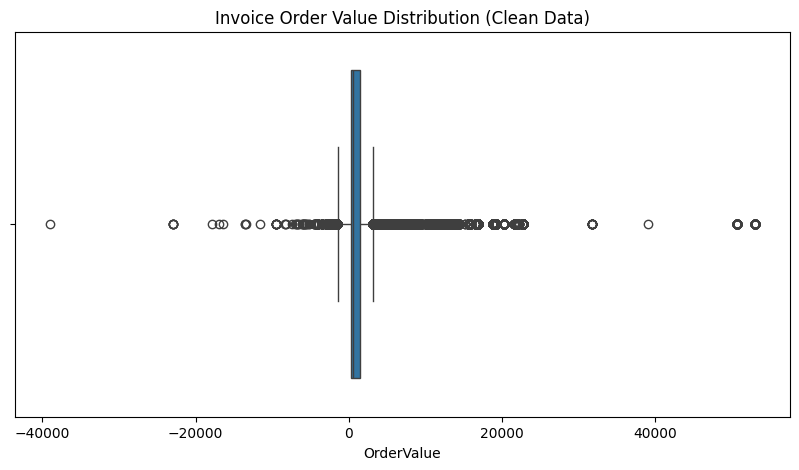

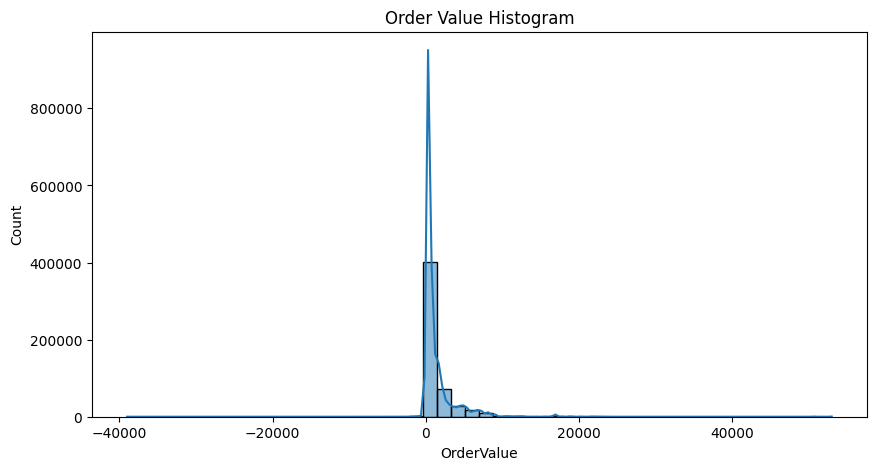

In [344]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["OrderValue"])
plt.title("Invoice Order Value Distribution (Clean Data)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["OrderValue"], bins=50, kde=True)
plt.title("Order Value Histogram")
plt.show()


In [415]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,FirstPurchaseDate,OrderValue
count,534123.000000,534123,534123.000000,401558.0,534123.000000,534123.000000,534123.000000,534123.000000,534123.000000,401470,534123.000000
mean,9.916362,2011-07-04 12:01:50.843344640,4.695892,15281.287376,18.249690,2010.921909,7.547497,15.020381,2.425331,2011-03-03 06:11:26.329489408,1351.199928
min,-9360.000000,2010-12-01 08:26:00,0.001000,12347.0,-38970.000000,2010.000000,1.000000,1.000000,0.000000,2010-12-01 08:26:00,-38970.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13939.0,3.750000,2011.000000,5.000000,7.000000,1.000000,2010-12-08 10:21:00,287.820000
50%,3.000000,2011-07-19 15:55:00,2.100000,15145.0,9.900000,2011.000000,8.000000,15.000000,2.000000,2011-01-19 09:05:00,518.730000
75%,10.000000,2011-10-18 17:10:00,4.130000,16788.0,17.570000,2011.000000,11.000000,22.000000,4.000000,2011-04-19 16:52:00,1449.880000
max,4800.000000,2011-12-09 12:50:00,38970.000000,18287.0,38970.000000,2011.000000,12.000000,31.000000,6.000000,2011-12-09 12:16:00,52940.940000
std,40.785986,NaN,95.079723,1713.969161,128.601023,0.268314,3.508452,8.659944,1.841671,NaN,2355.263846


In [464]:
large_orders_missing_cust = df[
    (df["OrderValue"] > 20000) & (df["CustomerID"].isna())
].copy()

In [465]:
large_orders_missing_cust.shape

(339, 20)

In [445]:
large_orders_missing_cust.to_excel("large_orders_missing_customer.xlsx", index=False)

In [450]:
df.loc[df["CustomerID"].isna(), "CustomerType"] = "Unknown"

In [485]:
upper_cap = df[df["CustomerID"].notna()]["OrderValue"].quantile(0.99)


In [472]:
lower_cap = df.loc[df["CustomerID"].notna(), "OrderValue"].quantile(0.01)

In [486]:
df['Overvalue_capped'] = df["OrderValue"].clip(upper=upper_cap, lower=lower_cap)

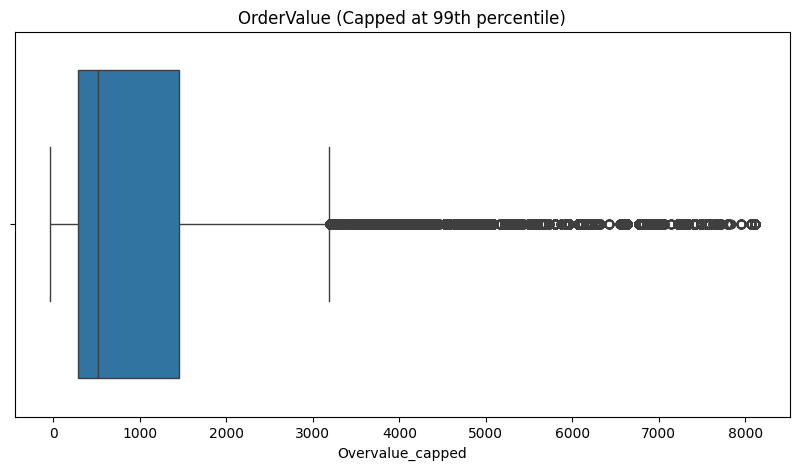

In [487]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Overvalue_capped"])
plt.title("OrderValue (Capped at 99th percentile)")
plt.show()

In [488]:
df['Overvalue_capped'].describe()

count    534123.000000
mean       1274.292123
std        1772.583678
min         -37.550000
25%         287.820000
50%         518.730000
75%        1449.880000
max        8107.720000
Name: Overvalue_capped, dtype: float64

In [489]:
# Count of OrderValues affected by lower cap
lower_capped_count = (df["OrderValue"] < lower_cap).sum()

# Count of OrderValues affected by upper cap
upper_capped_count = (df["OrderValue"] > upper_cap).sum()

print(f"Number of lower-capped invoices: {lower_capped_count}")
print(f"Number of upper-capped invoices: {upper_capped_count}")


Number of lower-capped invoices: 4337
Number of upper-capped invoices: 9269


In [491]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue,InvoiceYear,InvoiceMonth,InvoiceQuarter,InvoiceDay,InvoiceWeekday,FirstPurchaseDate,CustomerType,OrderValue,Overvalue_capped
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12


#### 6.4 Customer level aggregation

In [497]:
# Ensure we are using capped OrderValue
customer_df = df[df["CustomerID"].notna()].copy()

# Aggregate metrics
customer_agg = customer_df.groupby("CustomerID").agg(
    TotalRevenue=("Overvalue_capped", "sum"),
    Frequency=("InvoiceNo", "nunique"),
    AOV=("Overvalue_capped", "mean"),
    FirstPurchase=("InvoiceDate", "min"),
    LastPurchase=("InvoiceDate", "max")
).reset_index()

# Calculate recency in days (last purchase relative to last invoice date in dataset)
max_invoice_date = customer_df["InvoiceDate"].max()
customer_agg["RecencyDays"] = (max_invoice_date - customer_agg["LastPurchase"]).dt.days




In [498]:
customer_agg.head()

,CustomerID,TotalRevenue,Frequency,AOV,FirstPurchase,LastPurchase,RecencyDays
0,12347,134181.24,7,737.259560,2010-12-07 14:57:00,2011-12-07 15:52:00,1
1,12348,19307.24,4,622.814194,2010-12-16 19:09:00,2011-09-25 13:13:00,74
2,12349,128301.15,1,1757.550000,2011-11-21 09:51:00,2011-11-21 09:51:00,18
3,12350,5684.80,1,334.400000,2011-02-02 16:01:00,2011-02-02 16:01:00,309
4,12352,24435.55,11,257.216316,2011-02-16 12:33:00,2011-11-03 14:37:00,35


#### 6.5: Product-level aggregation

In [499]:
product_agg = df.groupby("StockCode").agg(
    ProductName = ("Description", "first"),
    TotalQuantity = ("Quantity", "sum"),
    TotalRevenue = ("Revenue", "sum"),
    AvgRevenue = ("Revenue", "mean"),
    NumInvoices = ("InvoiceNo", "nunique")
).reset_index()

In [500]:
product_agg.head()

,StockCode,ProductName,TotalQuantity,TotalRevenue,AvgRevenue,NumInvoices
0,10002,INFLATABLE POLITICAL GLOBE,860,759.89,10.702676,71
1,10080,GROOVY CACTUS INFLATABLE,303,119.09,5.413182,22
2,10120,DOGGY RUBBER,192,40.32,1.390345,29
3,10123C,HEARTS WRAPPING TAPE,5,3.25,1.083333,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16,6.72,1.344000,5


#### 6.6: Country-level Aggregation

In [507]:
country_agg = df.groupby("Country").agg(
    TotalRevenue = ("Overvalue_capped","sum"),
    TotalOrders = ("InvoiceNo","nunique"),
    AvgOrderValue = ("Overvalue_capped", 'mean')
).reset_index()


In [508]:
country_agg.head()

,Country,TotalRevenue,TotalOrders,AvgOrderValue
0,Australia,5165721.19,69,4116.112502
1,Austria,307311.71,19,766.363367
2,Bahrain,6496.39,4,341.915263
3,Belgium,1179908.85,119,570.279773
4,Brazil,36595.20,1,1143.600000


## 7. Country & Text Standardization

#### 7.1: "Country" Standardization

In [512]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [513]:
country_map = {
    "EIRE": "Ireland",
    "USA": "United States",
    "RSA": "Republic of South Africa"
}

In [514]:
df['Country'] = df['Country'].replace(country_map)

In [515]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil',
       'United States', 'European Community', 'Malta',
       'Republic of South Africa'], dtype=object)

Updating country_agg dataset

In [516]:
country_agg = df.groupby("Country").agg(
    TotalRevenue = ("Overvalue_capped","sum"),
    TotalOrders = ("InvoiceNo","nunique"),
    AvgOrderValue = ("Overvalue_capped", 'mean')
).reset_index()

#### 7.2 Description Text Cleaning

In [518]:
df['Description'].isna().value_counts()

Description
False    534123
Name: count, dtype: int64

In [522]:
df["Description"] = (
    df["Description"]
    .str.upper()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)


In [523]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionFilled,IsReturn,Revenue,InvoiceYear,InvoiceMonth,InvoiceQuarter,InvoiceDay,InvoiceWeekday,FirstPurchaseDate,CustomerType,OrderValue,Overvalue_capped
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,15.30,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,22.00,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,20.34,2010,12,2010Q4,1,2,2010-12-01 08:26:00,New,139.12,139.12


## 8. Time-Based Validation

In [524]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

## 9. Data Integrity Checks
- Validate:
  - Revenue totals after cleaning
  - Consistency between Quantity, UnitPrice, and Revenue
- Re-run summary statistics after each major cleaning step.

In [526]:
df["Revenue_check"] = df["Quantity"] * df["UnitPrice"]

In [527]:

df["Revenue_diff"] = np.abs(df["Revenue"] - df["Revenue_check"])

inconsistent_revenue = df[df["Revenue_diff"] > 0.01]

inconsistent_revenue.shape

(0, 22)

In [528]:
df.drop(columns=["Revenue_check", "Revenue_diff"], inplace=True)


In [529]:
raw_df = pd.read_csv("C:/Users/acer/Documents/Data Analyst - Field Training Program/Portfolio/3. E-commerce/Dataset/data.csv", encoding="latin1")

In [531]:
raw_df["Revenue"] = raw_df["Quantity"] * raw_df["UnitPrice"]

In [534]:
raw_total_revenue = raw_df["Revenue"].sum()
clean_total_revenue = df["Revenue"].sum()

raw_total_revenue, clean_total_revenue


(np.float64(9747747.933999998), np.float64(9747579.223999998))

In [542]:
df[[
    "Quantity",
    "UnitPrice",
    "Revenue",
    "OrderValue_capped"
]].describe()

,Quantity,UnitPrice,Revenue,OrderValue_capped
count,534123.000000,534123.000000,534123.000000,534123.000000
mean,9.916362,4.695892,18.249690,1274.292123
std,40.785986,95.079723,128.601023,1772.583678
min,-9360.000000,0.001000,-38970.000000,-37.550000
25%,1.000000,1.250000,3.750000,287.820000
50%,3.000000,2.100000,9.900000,518.730000
75%,10.000000,4.130000,17.570000,1449.880000
max,4800.000000,38970.000000,38970.000000,8107.720000


## 10. Final Clean Dataset Outputs
- **Clean Transactions Dataset** – Ready for exploratory analysis
- **Customer-Level Dataset** – For segmentation, CLV, retention analysis
- **Product-Level Dataset** – For inventory and performance optimization
- **Country-Level Dataset** – For geographic and market analysis


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534123 entries, 0 to 534122
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          534123 non-null  object        
 1   StockCode          534123 non-null  object        
 2   Description        534123 non-null  object        
 3   Quantity           534123 non-null  int64         
 4   InvoiceDate        534123 non-null  datetime64[ns]
 5   UnitPrice          534123 non-null  float64       
 6   CustomerID         401558 non-null  Int64         
 7   Country            534123 non-null  object        
 8   DescriptionFilled  534123 non-null  bool          
 9   IsReturn           534123 non-null  bool          
 10  Revenue            534123 non-null  float64       
 11  InvoiceYear        534123 non-null  int32         
 12  InvoiceMonth       534123 non-null  int32         
 13  InvoiceQuarter     534123 non-null  period[Q

In [545]:
transactions_final = df[[
    "InvoiceNo",
    "StockCode",
    "Description",
    "Quantity",
    "UnitPrice",
    "Revenue",
    "OrderValue_capped",
    "InvoiceDate",
    "InvoiceYear",
    "InvoiceMonth",
    "InvoiceQuarter",
    "InvoiceDay",
    "InvoiceWeekday",
    "CustomerID",
    "CustomerType",
    "Country",
    "IsReturn"
]].copy()


In [546]:
transactions_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534123 entries, 0 to 534122
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          534123 non-null  object        
 1   StockCode          534123 non-null  object        
 2   Description        534123 non-null  object        
 3   Quantity           534123 non-null  int64         
 4   UnitPrice          534123 non-null  float64       
 5   Revenue            534123 non-null  float64       
 6   OrderValue_capped  534123 non-null  float64       
 7   InvoiceDate        534123 non-null  datetime64[ns]
 8   InvoiceYear        534123 non-null  int32         
 9   InvoiceMonth       534123 non-null  int32         
 10  InvoiceQuarter     534123 non-null  period[Q-DEC] 
 11  InvoiceDay         534123 non-null  int32         
 12  InvoiceWeekday     534123 non-null  int32         
 13  CustomerID         401558 non-null  Int64   

In [547]:
customers_final = customer_agg[[
    "CustomerID",
    "TotalRevenue",
    "Frequency",
    "AOV",
    "RecencyDays",
    "FirstPurchase",
    "LastPurchase"
]].copy()


In [549]:
customers_final = customers_final.sort_values("TotalRevenue", ascending=False)


In [550]:
customers_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4370 entries, 1298 to 2890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     4370 non-null   Int64         
 1   TotalRevenue   4370 non-null   float64       
 2   Frequency      4370 non-null   int64         
 3   AOV            4370 non-null   float64       
 4   RecencyDays    4370 non-null   int64         
 5   FirstPurchase  4370 non-null   datetime64[ns]
 6   LastPurchase   4370 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), float64(2), int64(2)
memory usage: 277.4 KB


In [551]:
product_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StockCode      3937 non-null   object 
 1   ProductName    3937 non-null   object 
 2   TotalQuantity  3937 non-null   int64  
 3   TotalRevenue   3937 non-null   float64
 4   AvgRevenue     3937 non-null   float64
 5   NumInvoices    3937 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 184.7+ KB


In [552]:
products_final = product_agg[[
    "StockCode",
    "ProductName",
    "TotalQuantity",
    "TotalRevenue",
    "AvgRevenue",
    "NumInvoices"
]].copy()


In [554]:
products_final = products_final.sort_values("TotalRevenue", ascending=False)


In [555]:
products_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 3926 to 3913
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StockCode      3937 non-null   object 
 1   ProductName    3937 non-null   object 
 2   TotalQuantity  3937 non-null   int64  
 3   TotalRevenue   3937 non-null   float64
 4   AvgRevenue     3937 non-null   float64
 5   NumInvoices    3937 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 215.3+ KB


In [556]:
country_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        38 non-null     object 
 1   TotalRevenue   38 non-null     float64
 2   TotalOrders    38 non-null     int64  
 3   AvgOrderValue  38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [558]:
country_agg.rename(columns={'TotalOrders': 'NumOrders'}, inplace=True)

In [559]:
countries_final = country_agg[[
    "Country",
    "TotalRevenue",
    "NumOrders",
    "AvgOrderValue"
]].copy()


In [560]:
countries_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        38 non-null     object 
 1   TotalRevenue   38 non-null     float64
 2   NumOrders      38 non-null     int64  
 3   AvgOrderValue  38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [563]:
transactions_final.to_csv("clean_transactions.csv", index=False)
customers_final.to_csv("customers_final.csv", index=False)
products_final.to_csv("products_final.csv", index=False)
countries_final.to_csv("countries_final.csv", index=False)
